<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/Naive_Bayes_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification & Sentiment Analysis on Blog Data
This notebook parses unstructured blog text data, classifies categories using Naive Bayes, and performs sentiment analysis with TextBlob.

## Step 1: Parse Raw Data

In [1]:
import pandas as pd
import re

# Path to raw file
raw_file = "blogs.csv"

# Read lines
with open(raw_file, encoding="utf-8") as f:
    lines = f.readlines()

# Group lines into blog entries
posts = []
current_post = []
category = "Unknown"

for line in lines:
    if line.startswith("Newsgroups:"):
        category = line.strip().replace("Newsgroups: ", "")
    if line.strip() == '' and current_post:
        full_post = " ".join(current_post).strip()
        if full_post:
            posts.append((full_post, category))
        current_post = []
        category = "Unknown"
    else:
        current_post.append(line.strip())

# Catch last post if file does not end with blank line
if current_post:
    full_post = " ".join(current_post).strip()
    if full_post:
        posts.append((full_post, category))

# Create DataFrame
df = pd.DataFrame(posts, columns=["Data", "Labels"])
df.head()

,Data,Labels
0,"Data,Labels ""Path: cantaloupe.srv.cs.cmu.edu!m...",alt.atheism
1,In article <1r76ek$7uo@fido.asd.sgi.com> lives...,Unknown
2,I'd say the majority of people have a moral sy...,Unknown
3,"Not necessarily. """"Love thy neighbour"""" does ...",Unknown
4,Not in my opinion. If they were doing it beca...,Unknown


## Step 2: Sentiment Analysis

In [2]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)
df[['Data', 'Sentiment']].head()

,Data,Sentiment
0,"Data,Labels ""Path: cantaloupe.srv.cs.cmu.edu!m...",Negative
1,In article <1r76ek$7uo@fido.asd.sgi.com> lives...,Positive
2,I'd say the majority of people have a moral sy...,Positive
3,"Not necessarily. """"Love thy neighbour"""" does ...",Negative
4,Not in my opinion. If they were doing it beca...,Positive


## Step 3: Feature Extraction and Classification

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Data'])
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9168370824812543

Classification Report:
                                                                                                                                                                                                                                                                precision    recall  f1-score   support

                                                                                                                                                                                                                                                      Unknown       0.92      1.00      0.96      2680
                                                                                                                                                                                                     alt.3d,comp.graphics.visualization,comp.graphics,sci.med       0.00      0.00      0.00         1
                                                            

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 4: Sentiment Distribution Visualization


Sentiment distribution by category:
 Sentiment                                           Negative  Neutral  \
Labels                                                                  
 misc.forsale,rec.video                                  1.0      0.0   
5col.forsale,ne.forsale,misc.forsale                     1.0      0.0   
Unknown                                               2750.0   4682.0   
alt.3d,comp.graphics.visualization,comp.graphic...       1.0      0.0   
alt.activism,talk.politics.misc                          1.0      0.0   
...                                                      ...      ...   
talk.religion.misc,talk.origins,alt.slack                0.0      0.0   
talk.religion.misc,talk.politics.guns,soc.cultu...       8.0      0.0   
talk.religion.misc,talk.politics.misc,sci.skeptic        8.0      0.0   
tx.motorcycles,rec.motorcycles                           1.0      0.0   
tx.politics,talk.politics.misc                           0.0      0.0   

Sentiment   

<ipython-input-4-68aa3a8c1c3b>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


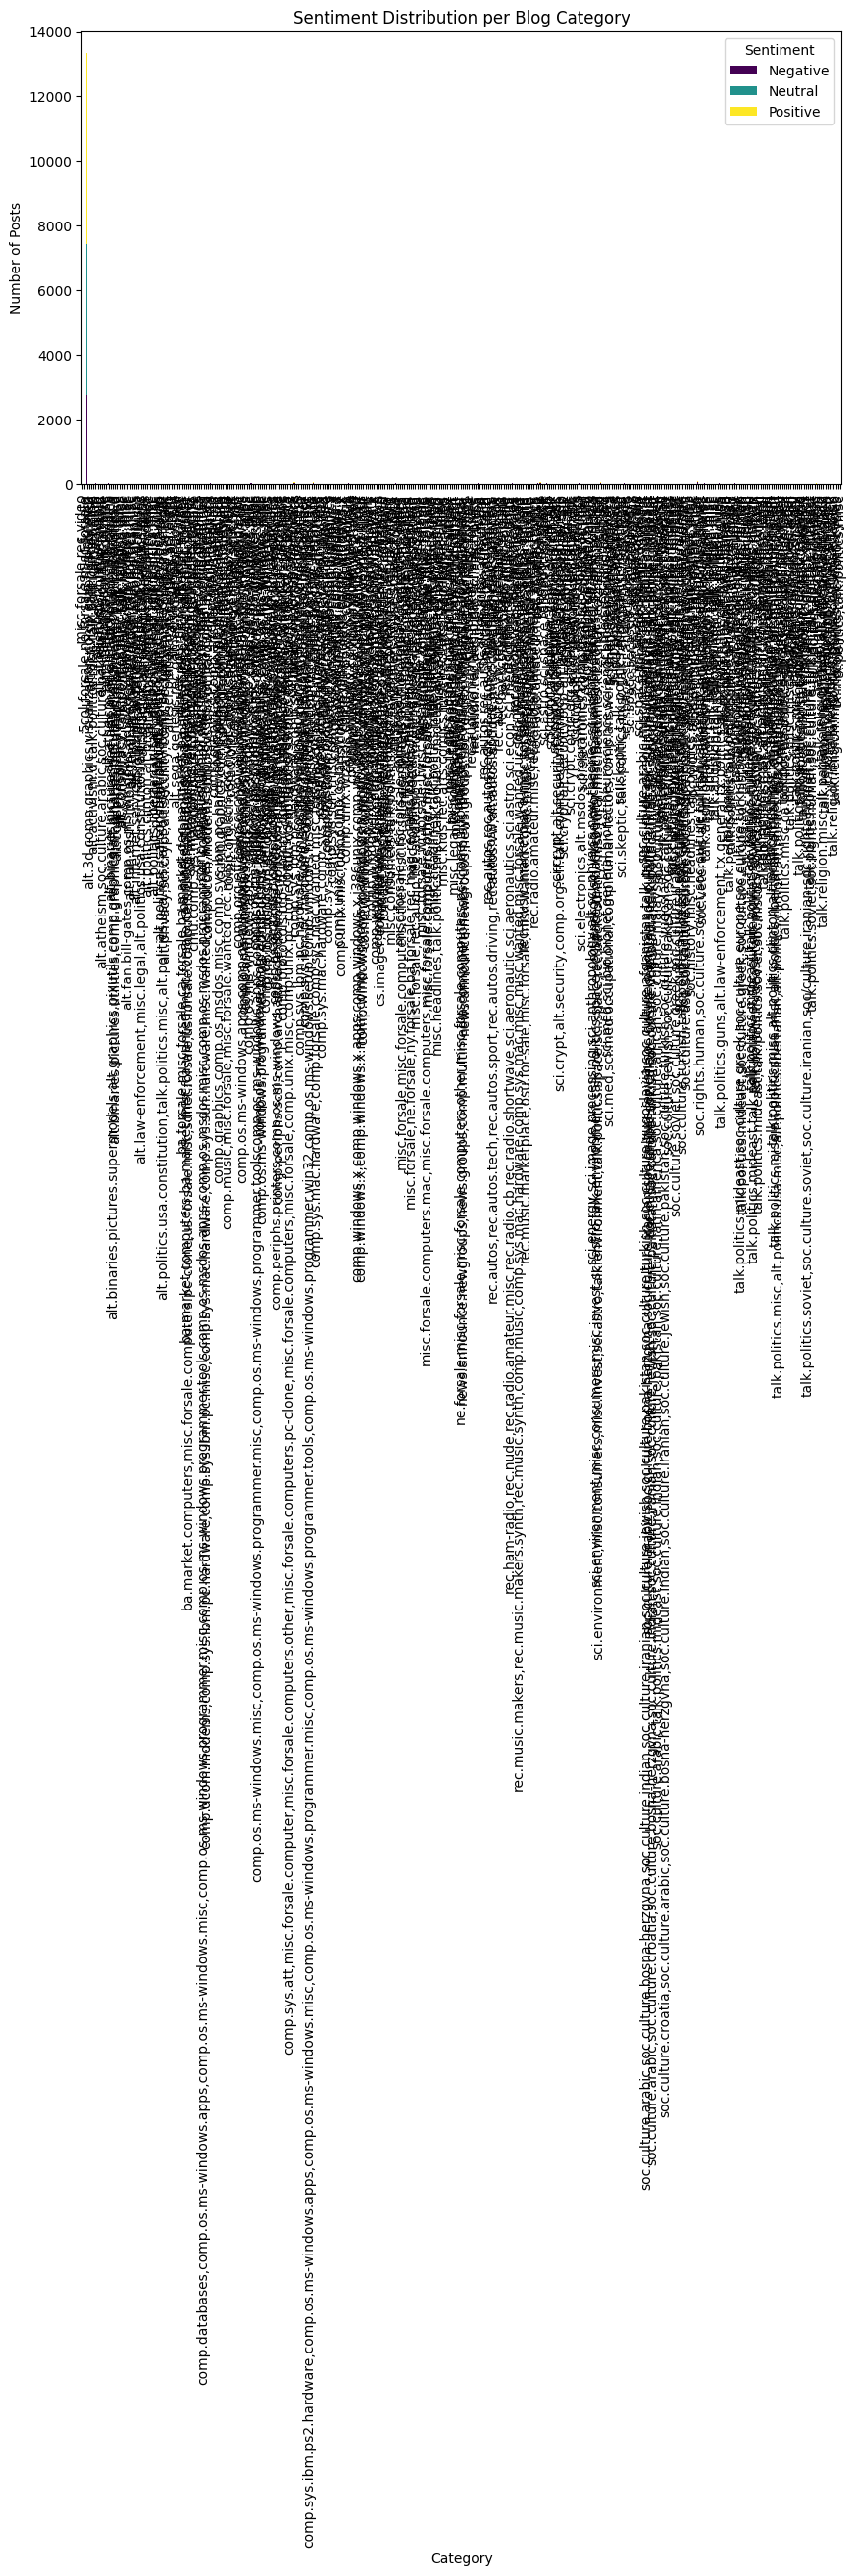

In [4]:
import matplotlib.pyplot as plt

sentiment_dist = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print("\nSentiment distribution by category:\n", sentiment_dist)

sentiment_dist.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Sentiment Distribution per Blog Category")
plt.ylabel("Number of Posts")
plt.xlabel("Category")
plt.tight_layout()
plt.show()